<a href="https://colab.research.google.com/github/chuan1215/DLI_GroupAG/blob/main/DLI_GroupAG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORT CSV FILES

In [33]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [35]:
data_path = "/content/drive/MyDrive/Colab Notebooks/dataset_phishing.csv"
df = pd.read_csv(data_path)

# Display dataset info
print("Initial dataset shape:", df.shape)
df.head();

Initial dataset shape: (11430, 89)


Data Cleaning

In [36]:
# Drop rows with missing values
df.dropna(inplace=True)
print("After dropping NA:", df.shape)

# Check if there are any categorical values that need encoding
print("Data types:\n", df.dtypes)

# Identify the label column (based on your output, it's likely 'status')
if 'class' in df.columns:
    df.rename(columns={'class': 'label'}, inplace=True)
elif 'status' in df.columns:
    df.rename(columns={'status': 'label'}, inplace=True)
else:
    raise KeyError("No target label column found. Please ensure the dataset has a 'class' or 'status' column.")

# Drop non-numeric and non-informative columns like 'url'
df.drop(columns=['url'], inplace=True, errors='ignore')

# Convert label column to binary (e.g., 'phishing' = 1, 'legitimate' = 0)
df['label'] = df['label'].map({'phishing': 1, 'legitimate': 0})

After dropping NA: (11430, 89)
Data types:
 url                object
length_url          int64
length_hostname     int64
ip                  int64
nb_dots             int64
                    ...  
web_traffic         int64
dns_record          int64
google_index        int64
page_rank           int64
status             object
Length: 89, dtype: object


Data Preparation

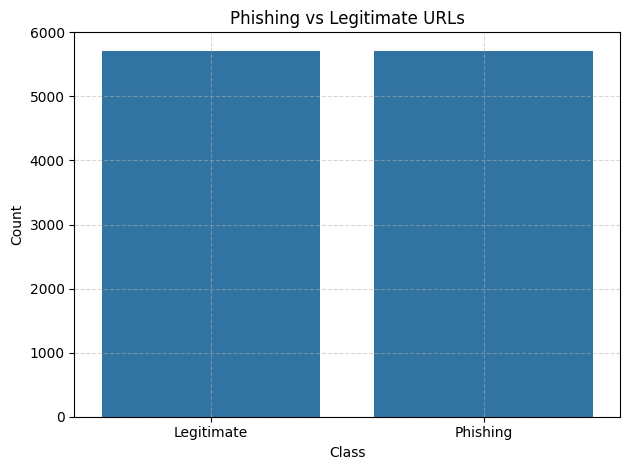

In [37]:
sns.countplot(data=df, x='label')
plt.title('Phishing vs Legitimate URLs')
plt.xticks([0, 1], ['Legitimate', 'Phishing'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Separate features and target
X = df.drop(columns=['label'])
y = df['label']

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

LeeJinYao(FNN)

In [38]:
# === Split features and labels ===
X = df.drop('label', axis=1).values
y = df['label'].values

# === Normalize features ===
scaler = StandardScaler()
X = scaler.fit_transform(X)

# === Train-test split ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training shape:", X_train.shape)
print("Testing shape:", X_test.shape)

# === Define model ===
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')   # binary classification
])

# === Compile ===
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# === Train ===
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1
)

# === Evaluate ===
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"\nTest Accuracy: {acc:.4f}")

# === Predictions & report ===
y_pred = (model.predict(X_test) > 0.5).astype(int)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Training shape: (9144, 87)
Testing shape: (2286, 87)
Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


286/286 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.7967 - loss: 0.4369 - val_accuracy: 0.9471 - val_loss: 0.1537
Epoch 2/20
286/286 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9304 - loss: 0.1987 - val_accuracy: 0.9571 - val_loss: 0.1282
Epoch 3/20
286/286 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9368 - loss: 0.1761 - val_accuracy: 0.9584 - val_loss: 0.1202
Epoch 4/20
286/286 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9476 - loss: 0.1487 - val_accuracy: 0.9598 - val_loss: 0.1183
Epoch 5/20
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9482 - loss: 0.1406 - val_accuracy: 0.9615 - val_loss: 0.1126
Epoch 6/20
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9544 - loss: 0.1341 - val_accuracy: 0.9624 - val_loss: 0.1095
Epoch 7/20
286/286 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9574 - loss: 0.1245 - val_accuracy: 0.9624 - val_loss: 0.1040
Epoch 8/20
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9557 - loss: 0.1227 - val_accuracy: 0.9654 - val

In [39]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


Test Accuracy: 96.72%


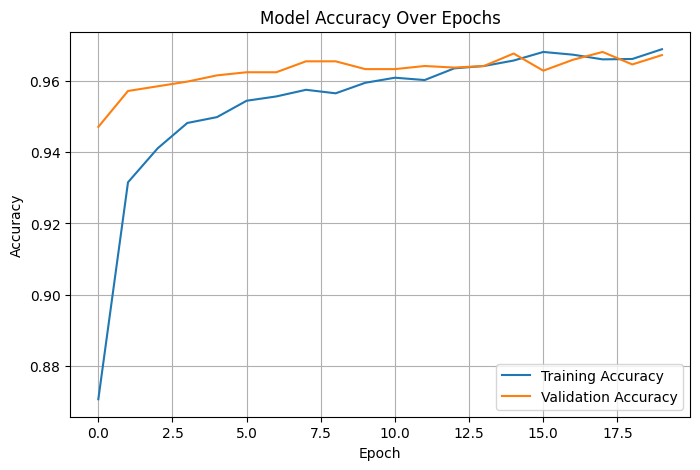

In [40]:
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


CNN - Faris

Data Preparation for CNN

In [41]:
X_cnn = X.reshape(X.shape[0], X.shape[1], 1)
X_train_cnn, X_test_cnn, y_train_cnn, y_test_cnn = train_test_split(
    X_cnn, y, test_size=0.2, random_state=42
)

Model Building

In [42]:
cnn_model = Sequential([
    Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_cnn.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    Conv1D(64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model Training

In [43]:
cnn_history = cnn_model.fit(
    X_train_cnn, y_train_cnn,
    epochs=10,
    batch_size=32,
    validation_data=(X_test_cnn, y_test_cnn),
    verbose=1
)

Epoch 1/10
286/286 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.7933 - loss: 0.4548 - val_accuracy: 0.9226 - val_loss: 0.2175
Epoch 2/10
286/286 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.8951 - loss: 0.2708 - val_accuracy: 0.9383 - val_loss: 0.1686
Epoch 3/10
286/286 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9099 - loss: 0.2326 - val_accuracy: 0.9423 - val_loss: 0.1483
Epoch 4/10
286/286 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9165 - loss: 0.2128 - val_accuracy: 0.9501 - val_loss: 0.1430
Epoch 5/10
286/286 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9312 - loss: 0.1950 - val_accuracy: 0.9471 - val_loss: 0.1431
Epoch 6/10
286/286 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9280 - loss: 0.1857 - val_accuracy: 0.9536 - val_loss: 0.1280
Epoch 7/10
286/286 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9329 - loss: 0.1842 - val_accuracy: 0.9440 - val_loss: 0.1364
Epoch 8/10
286/286 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9330 - loss: 0.1862 - val_accu

Model Evaluation

72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9567 - loss: 0.1240
✅ CNN Test Accuracy: 95.49%
✅ CNN Test Loss: 0.1212
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

Classification Report (CNN):
              precision    recall  f1-score   support

  Legitimate       0.95      0.96      0.96      1157
    Phishing       0.96      0.95      0.95      1129

    accuracy                           0.95      2286
   macro avg       0.96      0.95      0.95      2286
weighted avg       0.96      0.95      0.95      2286



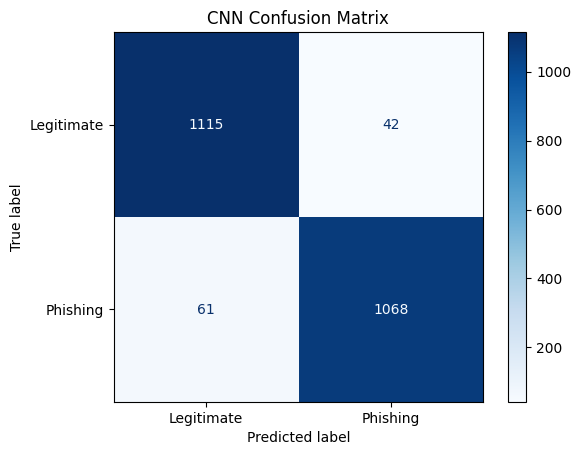

In [44]:
loss, accuracy = cnn_model.evaluate(X_test_cnn, y_test_cnn)
print(f"✅ CNN Test Accuracy: {accuracy * 100:.2f}%")
print(f"✅ CNN Test Loss: {loss:.4f}")

# Predictions
y_pred_prob_cnn = cnn_model.predict(X_test_cnn).ravel()
y_pred_cnn = (y_pred_prob_cnn > 0.5).astype("int32")

# Classification Report
print("\nClassification Report (CNN):")
print(classification_report(y_test_cnn, y_pred_cnn, target_names=["Legitimate", "Phishing"]))

# Confusion Matrix
cm_cnn = confusion_matrix(y_test_cnn, y_pred_cnn)
disp_cnn = ConfusionMatrixDisplay(confusion_matrix=cm_cnn, display_labels=["Legitimate", "Phishing"])
disp_cnn.plot(cmap=plt.cm.Blues)
plt.title("CNN Confusion Matrix")
plt.show()

Performance Visualization

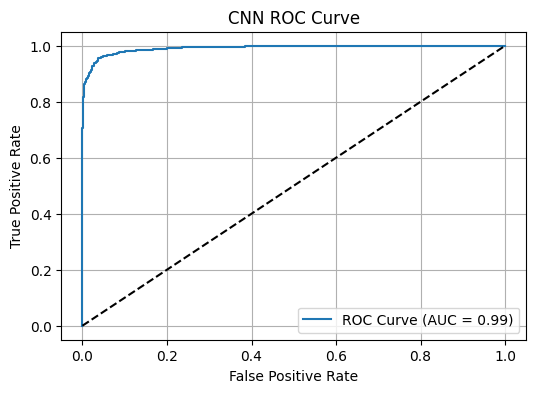

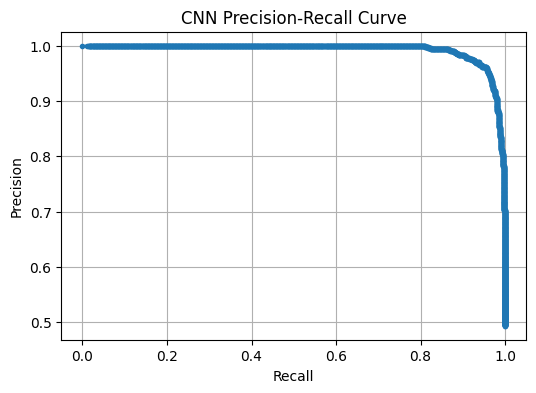

In [45]:
# ROC Curve
fpr_cnn, tpr_cnn, _ = roc_curve(y_test_cnn, y_pred_prob_cnn)
roc_auc_cnn = auc(fpr_cnn, tpr_cnn)
plt.figure(figsize=(6,4))
plt.plot(fpr_cnn, tpr_cnn, label=f'ROC Curve (AUC = {roc_auc_cnn:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('CNN ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Precision-Recall Curve
precision_cnn, recall_cnn, _ = precision_recall_curve(y_test_cnn, y_pred_prob_cnn)
plt.figure(figsize=(6,4))
plt.plot(recall_cnn, precision_cnn, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('CNN Precision-Recall Curve')
plt.grid(True)
plt.show()

**TANG SI CHUON - Deep Neural Network (DNN)**

Create DNN Model

In [46]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import Input

# Define the model
model = Sequential([
    Input(shape=(X_train.shape[1],)),  # Input layer
    Dense(128, activation='relu'),
    Dropout(0.3),  # Regularization to prevent overfitting
    Dense(64, activation='relu'),  # Hidden layer
    Dropout(0.3),
    Dense(32, activation='relu'),  # Hidden layer
    Dense(1, activation='sigmoid')  # Output (binary classification)
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

Train DNN Model

In [47]:
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=20,
                    batch_size=32,
                    verbose=1)

Epoch 1/20
286/286 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8162 - loss: 0.3832 - val_accuracy: 0.9510 - val_loss: 0.1327
Epoch 2/20
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9426 - loss: 0.1659 - val_accuracy: 0.9576 - val_loss: 0.1154
Epoch 3/20
286/286 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9507 - loss: 0.1356 - val_accuracy: 0.9611 - val_loss: 0.1105
Epoch 4/20
286/286 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9584 - loss: 0.1250 - val_accuracy: 0.9646 - val_loss: 0.1025
Epoch 5/20
286/286 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9575 - loss: 0.1265 - val_accuracy: 0.9659 - val_loss: 0.1055
Epoch 6/20
286/286 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9598 - loss: 0.1128 - val_accuracy: 0.9641 - val_loss: 0.1030
Epoch 7/20
286/286 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9592 - loss: 0.1194 - val_accuracy: 0.9668 - val_loss: 0.0924
Epoch 8/20
286/286 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9608 - loss: 0.1049 - val_accuracy: 0

Evaluate Peformance for DNN Model

In [48]:
# Evaluate on test set
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {acc*100:.4f}%")

# Predictions
y_pred = (model.predict(X_test) > 0.5).astype("int32")

from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, digits=4))



Test Accuracy: 96.5879%
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[[1119   38]
 [  40 1089]]
              precision    recall  f1-score   support

           0     0.9655    0.9672    0.9663      1157
           1     0.9663    0.9646    0.9654      1129

    accuracy                         0.9659      2286
   macro avg     0.9659    0.9659    0.9659      2286
weighted avg     0.9659    0.9659    0.9659      2286



Confusion Matrix for DNN Model

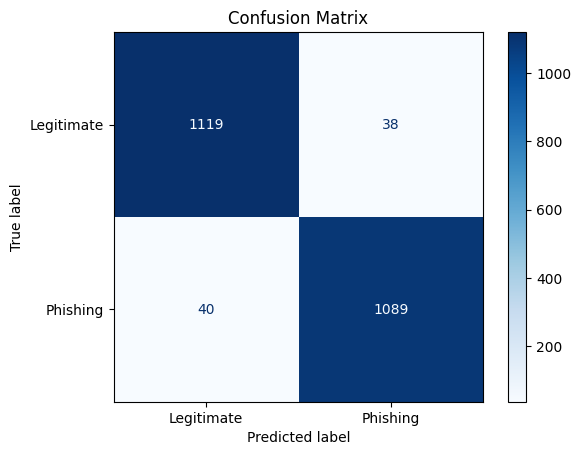

In [49]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Legitimate', 'Phishing'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


Accuracy & Loss Curves for DNN Model

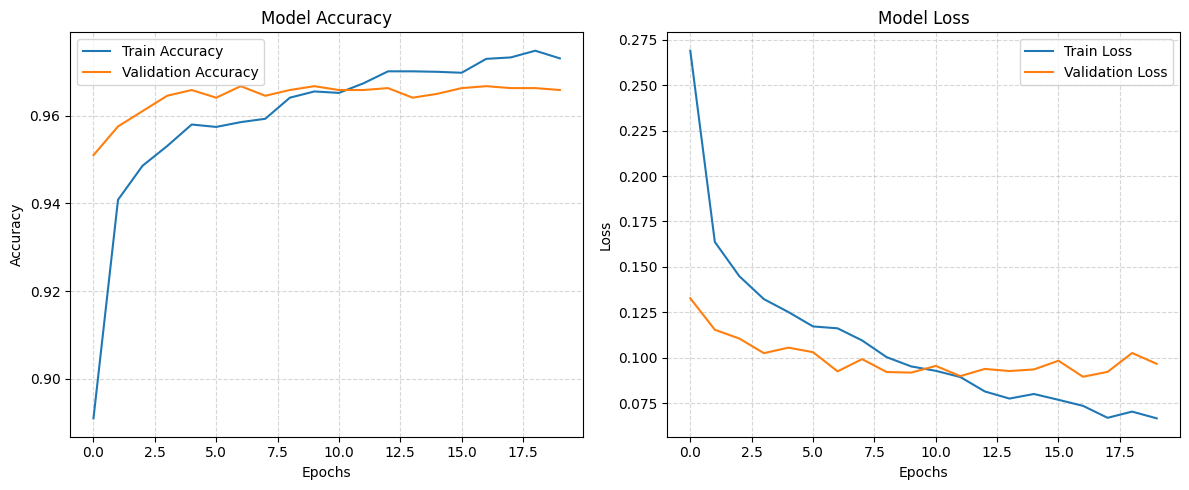

In [50]:
# Plot training history
plt.figure(figsize=(12,5))

# Accuracy plot
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

# Loss plot
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


Precision-Recall Curve for DNN Model

72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


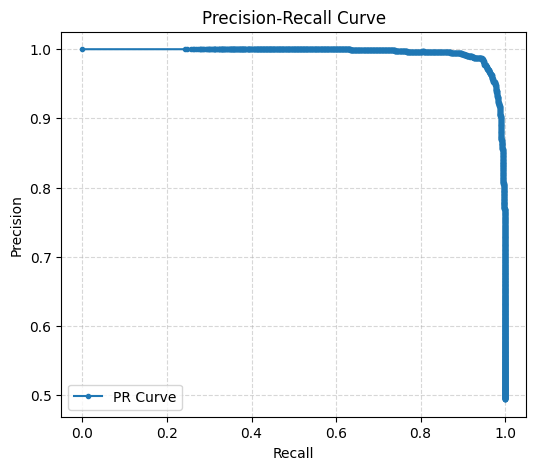

In [51]:
from sklearn.metrics import precision_recall_curve, roc_curve, auc

# Get predicted probabilities for positive class
y_pred_proba = model.predict(X_test).ravel()

# === Precision-Recall Curve ===
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_pred_proba)

plt.figure(figsize=(6,5))
plt.plot(recall, precision, marker='.', label='PR Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.show()

ROC Curve

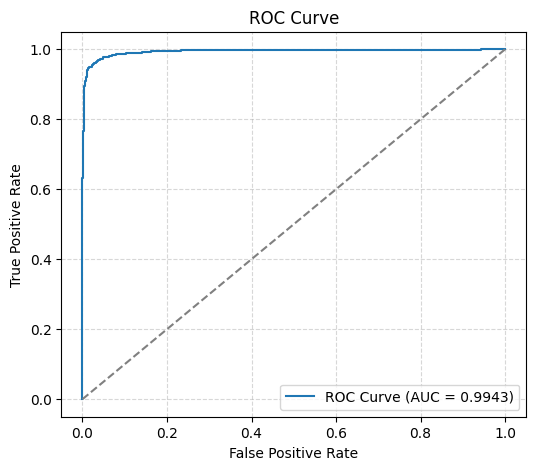

In [52]:
fpr, tpr, thresholds_roc = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.show()

Lau Yong Feng(ANN)

Create ANN Model

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib
import tensorflow as tf
from tensorflow.keras.layers import Input # Import Input

# Check class imbalance
unique_classes, class_counts = np.unique(y_train, return_counts=True)
class_weights = 'balanced' if max(class_counts) / min(class_counts) > 1.5 else None
print("[INFO] Class weight setting:", class_weights)

# Define the ANN model
ann_model = Sequential([
    Input(shape=(X_train.shape[1],)),  # Explicit Input layer
    Dense(128, activation='relu'),
    Dropout(0.3),  # Regularization to prevent overfitting
    Dense(64, activation='relu'),  # Hidden layer
    Dropout(0.3),
    Dense(1, activation='sigmoid') # Output layer for binary classification
])

# Compile the ANN model
ann_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

# Train the ANN model
history = ann_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the ANN model
loss, accuracy = ann_model.evaluate(X_test, y_test, verbose=0)
print("\nAccuracy:", accuracy)

# Predictions
y_pred_prob = ann_model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype("int32")

print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=4))

[INFO] Class weight setting: None
Epoch 1/20
229/229 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8113 - loss: 0.3938 - val_accuracy: 0.9464 - val_loss: 0.1528
Epoch 2/20
229/229 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9375 - loss: 0.1647 - val_accuracy: 0.9502 - val_loss: 0.1392
Epoch 3/20
229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9457 - loss: 0.1485 - val_accuracy: 0.9546 - val_loss: 0.1318
Epoch 4/20
229/229 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9485 - loss: 0.1390 - val_accuracy: 0.9552 - val_loss: 0.1273
Epoch 5/20
229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9541 - loss: 0.1225 - val_accuracy: 0.9535 - val_loss: 0.1277
Epoch 6/20
229/229 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9585 - loss: 0.1175 - val_accuracy: 0.9552 - val_loss: 0.1261
Epoch 7/20
229/229 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9627 - loss: 0.1058 - val_accuracy: 0.9557 - val_loss: 0.1287
Epoch 8/20
229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9630

Plot Training History For ANN

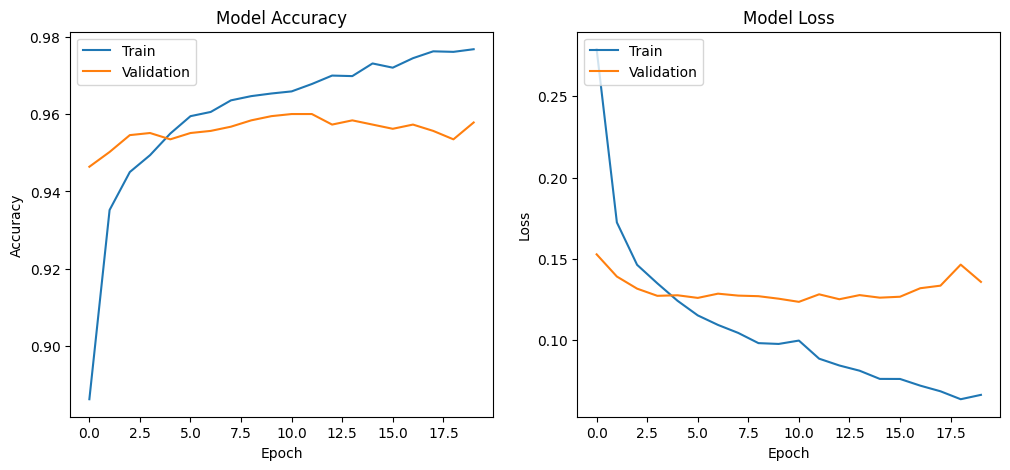

In [54]:
# Plot training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Confusion Matrix For ANN Model

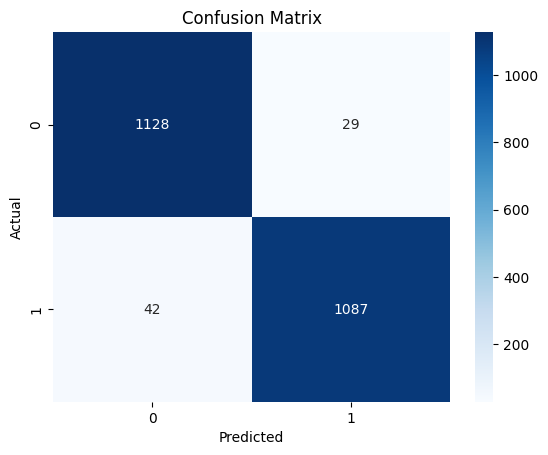

In [55]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Precision-Recall Curve For ANN Model

72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


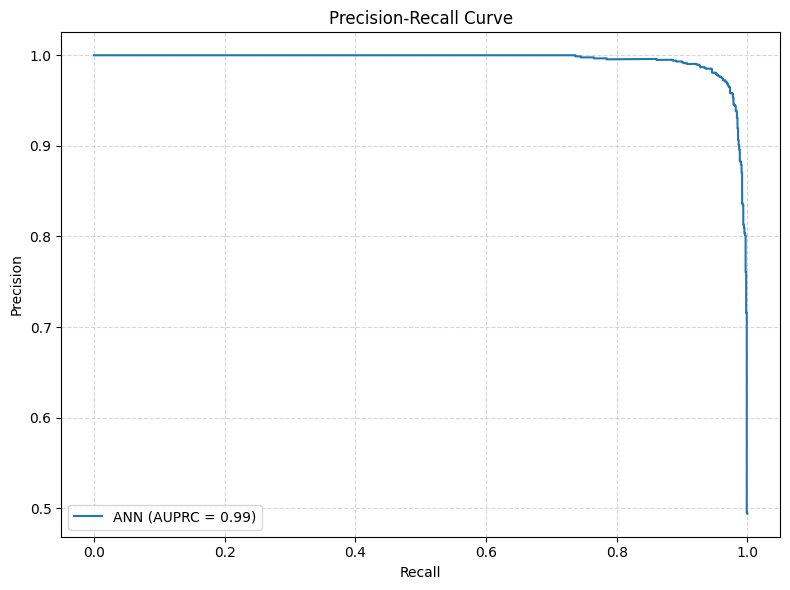

In [56]:
from sklearn.metrics import precision_recall_curve, auc

# Get precision and recall values for the ANN model
y_scores_ann = ann_model.predict(X_test).ravel()  # Probability of the positive class
precision_ann, recall_ann, _ = precision_recall_curve(y_test, y_scores_ann)

# Calculate the Area Under the PR Curve (AUPRC)
auprc_ann = auc(recall_ann, precision_ann)

# Plot the PR curve
plt.figure(figsize=(8, 6))
plt.plot(recall_ann, precision_ann, label=f'ANN (AUPRC = {auprc_ann:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

ROC Curve For ANN Model

72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


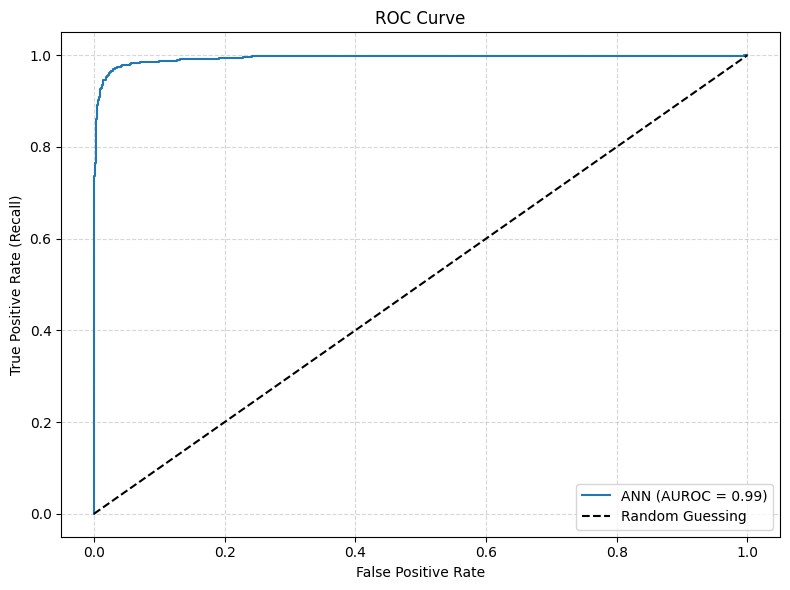

In [57]:
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for the positive class
y_scores_ann = ann_model.predict(X_test).ravel()

# Calculate ROC curve
fpr_ann, tpr_ann, _ = roc_curve(y_test, y_scores_ann)

# Calculate Area Under the ROC Curve (AUROC)
auroc_ann = auc(fpr_ann, tpr_ann)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_ann, tpr_ann, label=f'ANN (AUROC = {auroc_ann:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Support Vector Machines (SVM) YAP JIN CHENG

Import libraries and data preparation

In [68]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Assuming you have your data ready (X, y)
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Create and Train model

In [60]:
# Create the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # For binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model (this will show epoch progress)
history = model.fit(X_train_scaled, y_train,
                    validation_data=(X_test_scaled, y_test),
                    epochs=20,
                    batch_size=32,
                    verbose=1)  # verbose=1 shows the progress bar

# Make predictions
y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


286/286 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8316 - loss: 0.3741 - val_accuracy: 0.9541 - val_loss: 0.1250
Epoch 2/20
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9526 - loss: 0.1329 - val_accuracy: 0.9619 - val_loss: 0.1109
Epoch 3/20
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9554 - loss: 0.1195 - val_accuracy: 0.9619 - val_loss: 0.1058
Epoch 4/20
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9656 - loss: 0.0939 - val_accuracy: 0.9628 - val_loss: 0.1069
Epoch 5/20
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9683 - loss: 0.0919 - val_accuracy: 0.9624 - val_loss: 0.1094
Epoch 6/20
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9745 - loss: 0.0777 - val_accuracy: 0.9646 - val_loss: 0.1024
Epoch 7/20
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9751 - loss: 0.0730 - val_accuracy: 0.9602 - val_loss: 0.1118
Epoch 8/20
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9793 - loss: 0.0609 - val_accuracy: 0.9663 - val_

Classification Report

In [61]:
print("\nNeural Network Classification Report:")
print(classification_report(y_test, y_pred))


Neural Network Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1157
           1       0.96      0.96      0.96      1129

    accuracy                           0.96      2286
   macro avg       0.96      0.96      0.96      2286
weighted avg       0.96      0.96      0.96      2286



Accuracy Score

In [62]:
print("\nNeural Network Accuracy Score:")
print(accuracy_score(y_test, y_pred))


Neural Network Accuracy Score:
0.958005249343832


Confusion Matrix

In [63]:
print("\nNeural Network Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Neural Network Confusion Matrix:
[[1106   51]
 [  45 1084]]


Confusion matrix for SVM Model

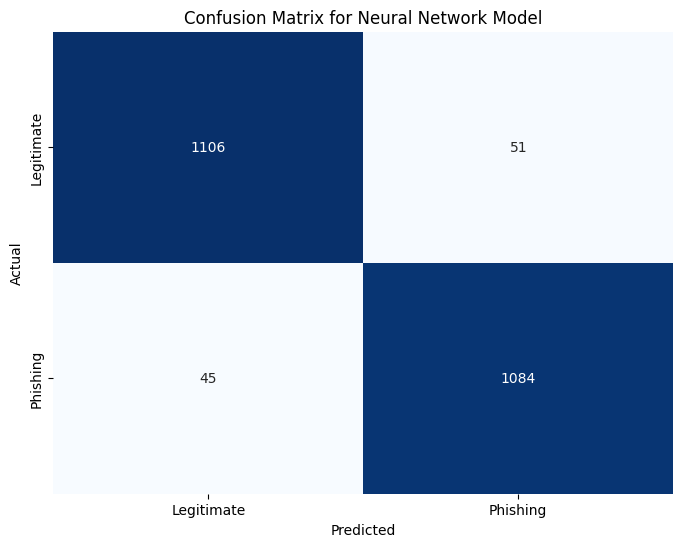

In [67]:
# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Legitimate', 'Phishing'], yticklabels=['Legitimate', 'Phishing'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Neural Network Model')
plt.show()